**BRIGHT BENARD**  

**2100702287**

In [ ]:
# mounting the drive dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from pylab import *
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import cluster
import matplotlib.pyplot as plt

from time import time

In [ ]:
import json
import requests
import os, shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
#Upload file from local drive 
# Upload comments.csv from the uploaded .zip folder)
from google.colab import files
uploaded = files.upload()

Saving Comments.csv to Comments.csv


In [ ]:
# Store dataset in Pandas Dataframe
import io
# df2 = pd.read_fwf(io.BytesIO(uploaded['Comments.txt']))
df2 = pd.read_csv(io.BytesIO(uploaded['Comments.csv']))

In [ ]:
# df2 = open("Comments.csv", "r")
# corpus = df2.read().split('\n')

**Preprocessing**

In [ ]:
df2

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
...,...,...
4105,8029,hosted websites
4106,8030,worked with cpanels
4107,8031,started mysql databases
4108,8032,able to do tasks assigned


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  4110 non-null   int64 
 1   Comment     4109 non-null   object
dtypes: int64(1), object(1)
memory usage: 64.3+ KB


In [ ]:
df2.describe()

,comment_id
count,4110.000000
mean,3793.745742
std,2049.104822
min,5.000000
25%,2101.250000
50%,3513.500000
75%,5457.500000
max,8033.000000


In [ ]:
df2.isnull

<bound method DataFrame.isnull of       comment_id                                            Comment
0              5                             djfjkdfjkjkffdk edited
1             41  Faith has exhibited enthusiasm in taking on th...
2             49  He now has now understood the structure of gra...
3             50  The Intern was oriented on ICT setup and Infra...
4             52  The student was oriented on the organization s...
...          ...                                                ...
4105        8029                                    hosted websites
4106        8030                                worked with cpanels
4107        8031                            started mysql databases
4108        8032                          able to do tasks assigned
4109        8033  good with website designing and database manag...

[4110 rows x 2 columns]>

In [ ]:
#Delete missing value
# Get names of indexes for which column synopsis has no overview
index_drop = df2[df2.iloc[:,1] == "na, nan"].index

# Delete these row indexes from dataFrame
df2.drop(index_drop , inplace=True)

# Reset the index
df2.reset_index(drop =True, inplace=True)

In [ ]:
def function_to_get_document(x):
    return x + 1
corpus = [function_to_get_document(comment_id) for comment_id in pd.read_csv('Comments.csv')['comment_id']]

**Case Folding**

In [ ]:
#case folding
df2.iloc[:, 1] = df2.iloc[:, 1].str.lower()
# df2.iloc[:, 1] = df2.iloc[:, 1].str.lower()
df2.iloc[:, 1].head()

0                               djfjkdfjkjkffdk edited
1    faith has exhibited enthusiasm in taking on th...
2    he now has now understood the structure of gra...
3    the intern was oriented on ict setup and infra...
4    the student was oriented on the organization s...
Name: Comment, dtype: object

**Handling stop words**

In [ ]:
#Sentimental analysis
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## **Corpus**

In [ ]:
#corpus
corpus = []
corp = []

df3 = df2.iloc[0:3013, :]

for i in range (0,3013):
  review = re.sub('[^a-zA-Z]', ' ', df3['Comment'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review) 
  corpus.append(review)

In [ ]:
#Vectorizer implementation
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df3.iloc[:,1].values

In [ ]:
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Split dataset into test and train**

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## **GAUSSIAN NAIVE BAYES ALGORITHMS**

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array(["she's doing well.", 'great work', 'good progress.',
       'hamza has successfully completed the first week of internship. we are going to equip him with hands-on skills and practical competence for the next 6 weeks.',
       'richard has acquired the basic knowledge of writing ussd applications.',
       'terry attendance record for these week was exceedingly proper regardless of the network connection challenges.\nhe has continued to maintain a good working relationship with team members he was assigned too.\nhe is so inquisitive, asks to learn and he has been so attentive during all the trainings.',
       'all tasks were were excepptionally done',
       'elsymus has successfully finished internship. he is supposed to write end of internship report explaining in detail all the new skills he has acquired. we wish him the very best.',
       'i commend you nabil for the diligence and punctuality exhibited this week. i also encourage you to share weekly reporting tips with you

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("\n\nConfusion Matrix:\n", cm)
#print("Accuracy:", classifier.score(X_test, y_test)*100, "%")



Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
def evaluate_clf(X_train, X_test, y_train, y_test, clf, name="Classifier"):
  from sklearn.metrics import f1_score, accuracy_score
  # fit the classifier
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  # evaluate prediction using acc and f1 score
  score_f1 = f1_score(y_test, pred)
  score_acc = accuracy_score(y_test, pred)
  print('{} acc-score: {}'.format(name, score_acc))
  print('{} f1-score: {}'.format(name, score_f1))

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
#from sklearn.metrics import confusion_matrix
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
#evaluate_clf(X_train, X_test, y_train, y_test, GaussianNB(), "Gaussian NB")
print("Precision Score : ",precision_score(y_test, y_pred,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive',average='micro'))

Precision Score :  0.10150753768844221
Recall Score :  0.10150753768844221


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**KMEANS ALGORITHM**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from pylab import *
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import cluster
import matplotlib.pyplot as plt

from time import time

In [ ]:
bodies = open("Comments.csv", "r")
corpus = bodies.read().split('\n')

In [ ]:
# print("Using TFIDF Vectorizer to produce Sparse Matrix of Features")
# vectorizer = TfidfVectorizer(stop_words='english')
# features = vectorizer.fit_transform(df2.iloc[:,1].values) 

# # vector TF-IDF (features)
# for i in features :
#   print(i)
#   print('-----------------------------')

In [ ]:
print("Using TFIDF Vectorizer to produce Sparse Matrix of Features")
import time
seconds = time.time()
print("Seconds since epoch =", seconds)	

Using TFIDF Vectorizer to produce Sparse Matrix of Features
Seconds since epoch = 1661707530.7471895


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5,
                                 min_df=5, stop_words='english')
X = vectorizer.fit_transform(corpus)
print("done in %fs" % (time.time() - seconds))
print("n_samples: %d, n_features: %d" % X.shape)
print("__________________________________________________________")
print()

done in 1038.217891s
n_samples: 5274, n_features: 1505
__________________________________________________________



In [ ]:
# Creates Cosine Similarity Matrix
cosine_similarity = (X * X.T).A

In [ ]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 30,
   "random_state": 42,
   }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(X)
   sse.append(kmeans.inertia_)

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [ ]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42)

**Elbow Method**

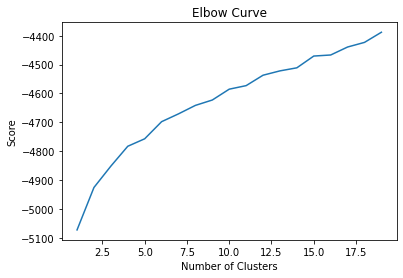

In [ ]:
## PLOTS ELBOW CURVE to find the "K" value
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

**Silhouttee Method**

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

In [ ]:
# Notice you start at 2 clusters for silhouette coefficient
# silhouette coefficient is a measure of cluster cohesion and separation
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_features)
   score = silhouette_score(scaled_features, kmeans.labels_)
   silhouette_coefficients.append(score)

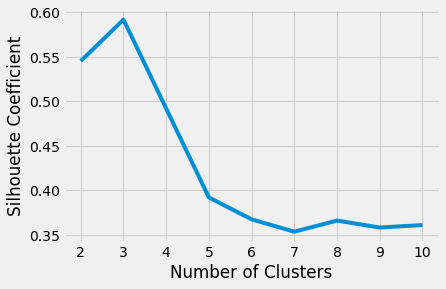

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Figure**

Average silhouette score plot shows that for each k shows that the best choice for k is 3 since it has the maximum score

Compute Silhouette scores

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
 # Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=10)
dbscan = DBSCAN(eps=0.3)

In [ ]:
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

DBSCAN(eps=0.3)

In [ ]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
    ).round(2)
dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
    ).round (2)

In [ ]:
kmeans_silhouette

0.37

In [ ]:
dbscan_silhouette

0.35

**About Silhouttes Algorithm**

Silhouette coefficient is higher for the k-means algorithm at 0.37. 

DBSCAN algorithm appears to find more natural clusters according to the shape of the data

In [ ]:
# LSA dimension reduction
print("Performing LSA Dimension Reduction")
seconds = time.time()
svd = TruncatedSVD(100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

Performing LSA Dimension Reduction


In [ ]:
X = lsa.fit_transform(X)

In [ ]:
print("done in %fs" % (time.time() - seconds))

done in 0.413108s


In [ ]:
print()
print("AFTER LSA matrix reduction: ")
print("n_samples: %d, n_features: %d" % X.shape)


AFTER LSA matrix reduction: 
n_samples: 5274, n_features: 100


In [ ]:
#K-MEANS CLUSTERING
km = KMeans(n_clusters=5, init='k-means++')
print("Clustering sparse data with %s" % km)
seconds = time.time()
km.fit(X)
y_means = km.predict(X)

Clustering sparse data with KMeans(n_clusters=5)


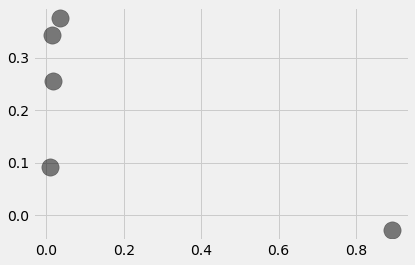

done in 1.768s



In [ ]:
#PLOTS K-MEANS CLUSTERING

# plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=300,alpha=0.5);
plt.show()

print("done in %0.3fs" % (time.time() - seconds))
print()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


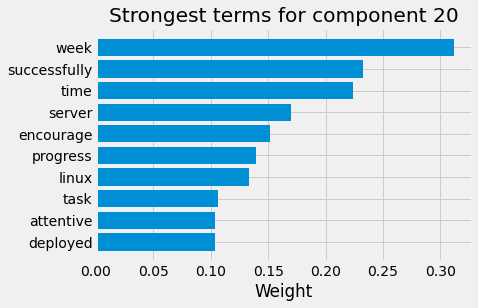

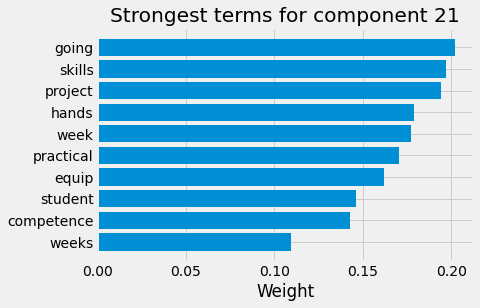

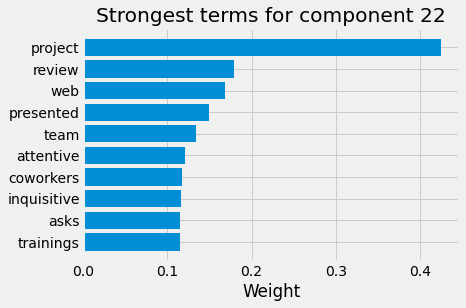

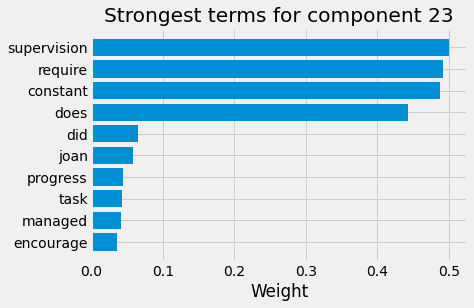

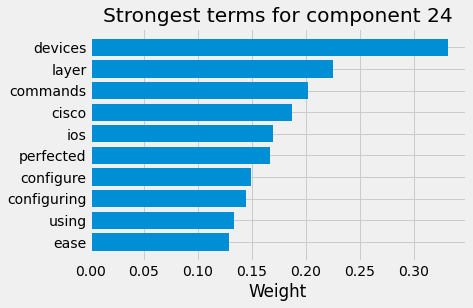

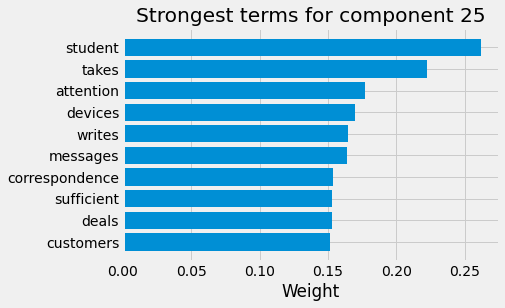

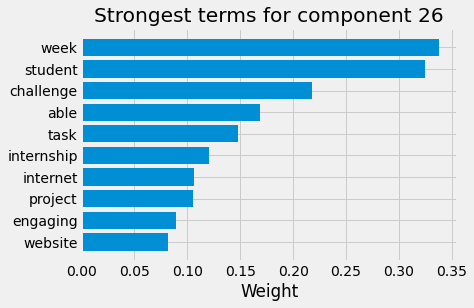

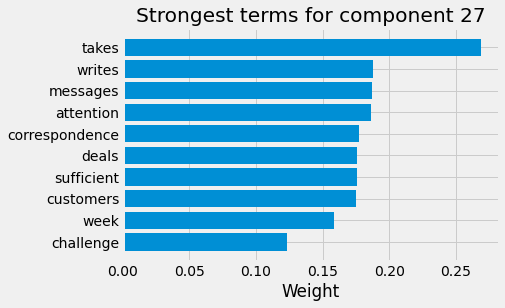

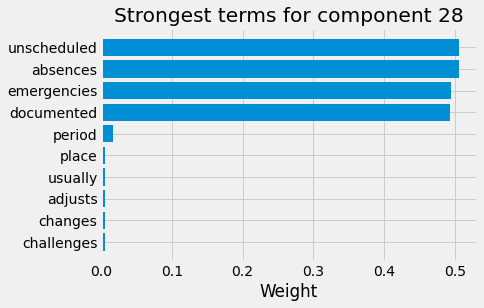

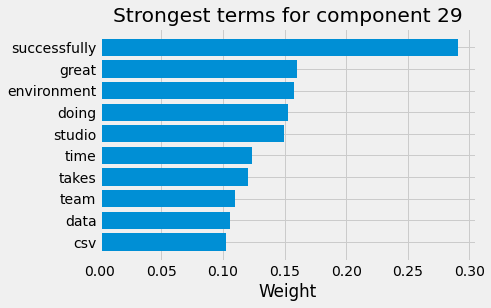

In [ ]:
#VISUALIZES STRONGEST TERMS OF COMPONENTS (LSA)
feat_names = vectorizer.get_feature_names()

for compNum in range(20,30):
    comp = svd.components_[compNum]

    indeces = np.argsort(comp).tolist()
    indeces.reverse()
    terms = [feat_names[weightIndex] for weightIndex in indeces[0:10]]
    weights = [comp[weightIndex] for weightIndex in indeces[0:10]]

    terms.reverse()
    weights.reverse()
    positions = arange(10) + .5    # the bar centers on the y axis

    figure(compNum)
    barh(positions, weights, align='center')
    yticks(positions, terms)
    xlabel('Weight')
    title('Strongest terms for component %d' % (compNum))
    grid(True)
    show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
kmeans = KMeans(n_clusters=10) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(n_clusters=10)

In [ ]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=10)

In [ ]:
# The lowest SSE value
kmeans.inertia_

4109.781617118756

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 3.65756096e-02,  3.94592539e-01, -2.72053910e-01,
        -1.78992043e-01,  1.90824304e-02,  1.87772069e-02,
         7.74365267e-02,  2.83674283e-02,  7.55746125e-03,
        -2.25651169e-02, -4.31155479e-03, -4.62174197e-02,
        -2.98694565e-02,  1.87756973e-03, -1.12289490e-03,
         2.24474048e-02,  8.06642975e-03, -2.05217733e-02,
        -1.66440762e-02,  1.17118840e-02, -3.13504105e-03,
         2.36201171e-02, -5.71395198e-03, -3.82452504e-03,
         1.48511414e-02, -8.11980114e-04,  5.78747075e-03,
        -3.30934781e-03,  9.53405793e-05, -1.05060171e-02,
        -5.16055131e-03,  2.34365791e-03, -4.38727837e-03,
         6.22661532e-03,  3.97422850e-03, -7.03498713e-03,
         3.72028762e-03, -1.68246724e-03,  5.28518524e-03,
         8.03727192e-04, -9.64495442e-03, -3.62838228e-03,
         7.83106689e-03, -3.73868559e-03, -8.88976119e-03,
        -3.96651228e-03, -2.44028766e-03,  5.08472114e-05,
        -7.56826229e-03,  3.16379706e-03, -3.82125182e-0

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

32

In [ ]:
kmeans.labels_[:5]

array([6, 6, 8, 6, 3], dtype=int32)